# Problem Statement

To predict the mortgage backed securities prepayement risk using ML models

# Data preprocessing


In this step, the data is primarily cleaned first. This means that the rows with null values are removed, the unwanted columns are dropped from the dataset etc. So that we are able to process the data better.


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("LoanExport.csv")
data.head()

C:\Users\priya\AppData\Local\Temp\ipykernel_6024\978166904.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("LoanExport.csv")


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [3]:
df=pd.DataFrame(data)
df.shape

(291451, 28)

In [4]:
df.info

<bound method DataFrame.info of         CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964

# Data Cleaning


In [5]:
#Checking for null values
df.columns[df.isna().any()]
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [6]:
df.SellerName.unique()

array(['FL', 'FT', 'GM', 'Ot', 'RE', 'NO', 'ST', 'CR', 'CH', 'FI', 'HO',
       'PR', nan, 'PN', 'WA', 'BA', 'G ', 'OL', 'AC', 'CO', 'BI'],
      dtype=object)

In [7]:
unwanted_columns = ['LoanSeqNum','SellerName','ServicerName','PostalCode']
df.drop(columns=unwanted_columns, inplace=True)
print("\nUpdated DataFrame:")
print(df)


Updated DataFrame:
        CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964   

       

In [8]:
print(df.nunique())
print(df.shape)

CreditScore           370
FirstPaymentDate       66
FirstTimeHomebuyer      3
MaturityDate           96
MSA                   392
MIP                    37
Units                   5
Occupancy               3
OCLTV                 102
DTI                    66
OrigUPB               375
LTV                    97
OrigInterestRate      254
Channel                 4
PPM                     3
ProductType             1
PropertyState          53
PropertyType            7
LoanPurpose             3
OrigLoanTerm           61
NumBorrowers            3
EverDelinquent          2
MonthsDelinquent      174
MonthsInRepayment     212
dtype: int64
(291451, 24)


In [9]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [10]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PPM,ProductType,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,N,FRM,IL,SF,P,360,2,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,N,FRM,CO,SF,N,360,1,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,N,FRM,KS,SF,N,360,2,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,N,FRM,CA,SF,N,360,2,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,N,FRM,NJ,SF,N,360,2,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,N,202902,37964,0,1,O,60,32,...,N,FRM,PA,SF,N,360,2,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,N,FRM,NY,SF,P,319,2,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,N,FRM,CA,SF,N,313,1,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,N,FRM,PA,SF,P,360,2,0,0,32


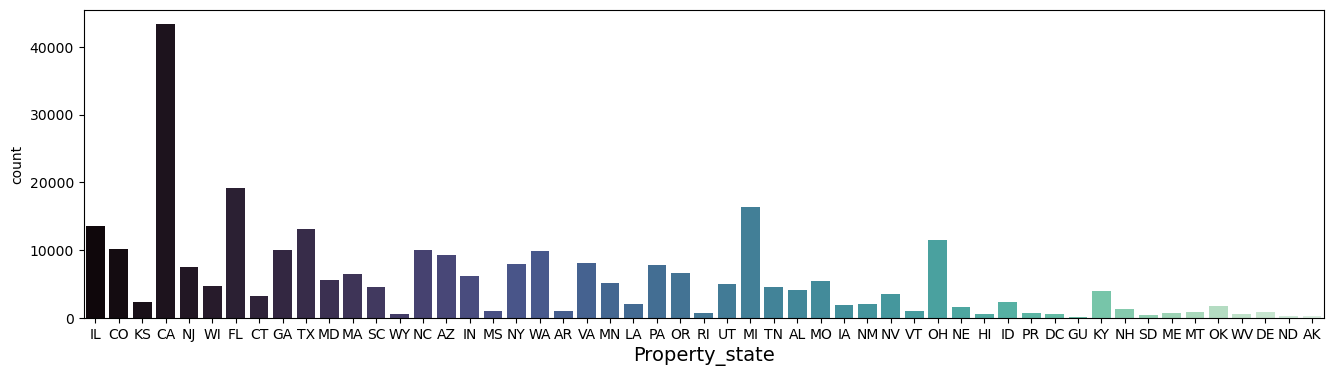

In [11]:
plt.figure(figsize=(16,4))
sns.countplot(x='PropertyState' , data=df ,palette='mako')
plt.xlabel('Property_state', fontsize=14)
plt.show()

# Univariate analysis

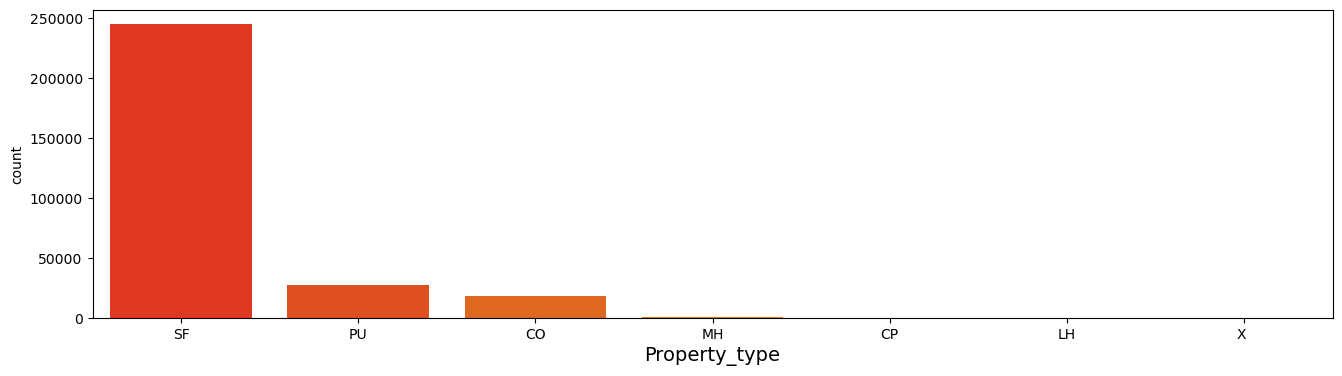

In [12]:
plt.figure(figsize=(16,4))
sns.countplot(x='PropertyType' , data=df ,palette='autumn')
plt.xlabel('Property_type', fontsize=14)
plt.show()

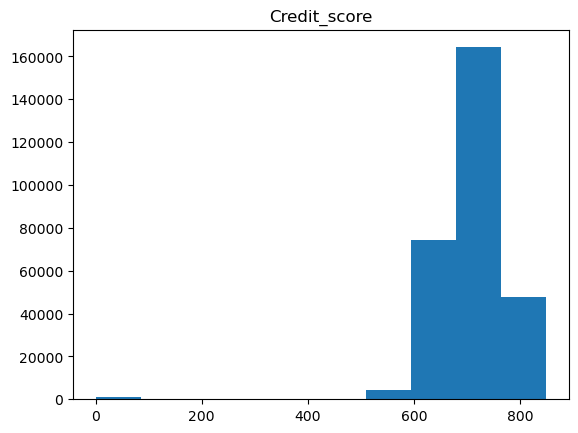

In [13]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  df[num]

plt.hist(df['CreditScore'])
plt.title("Credit_score")
plt.show()

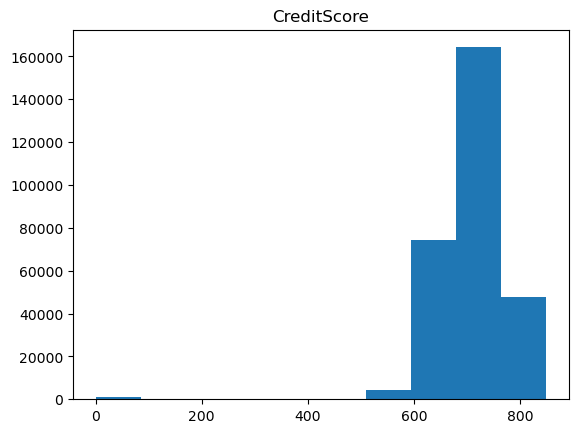

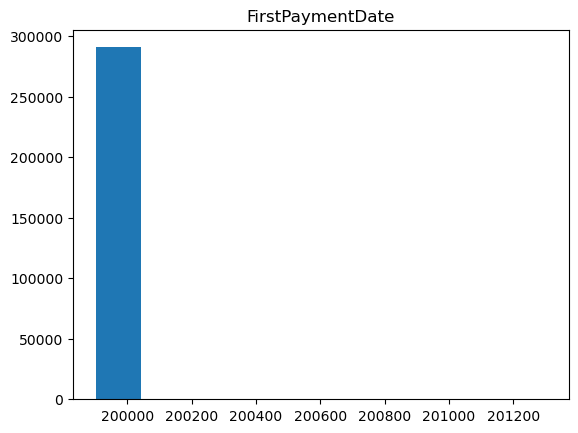

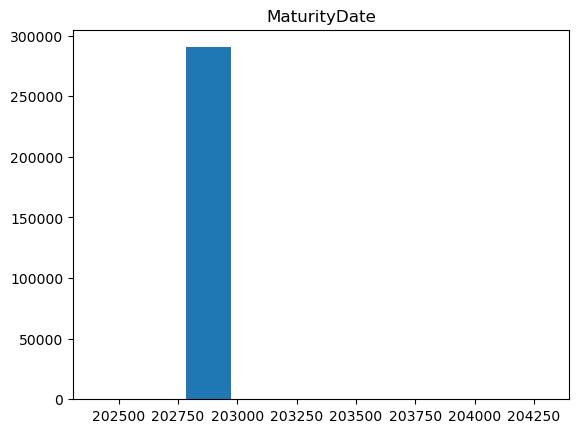

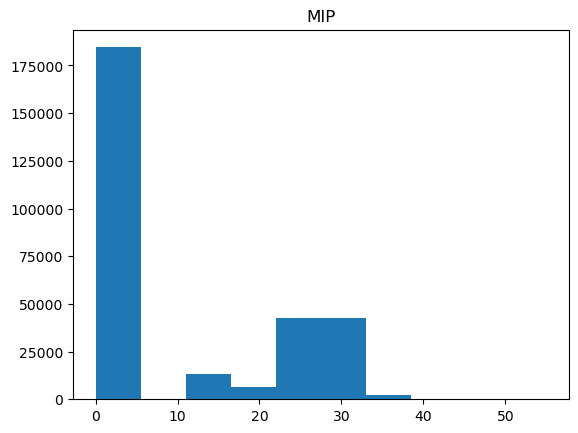

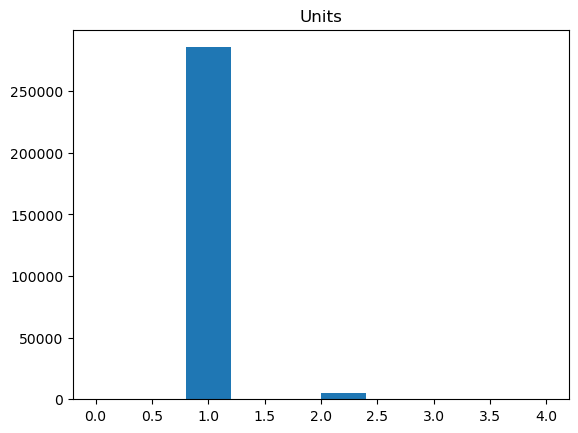

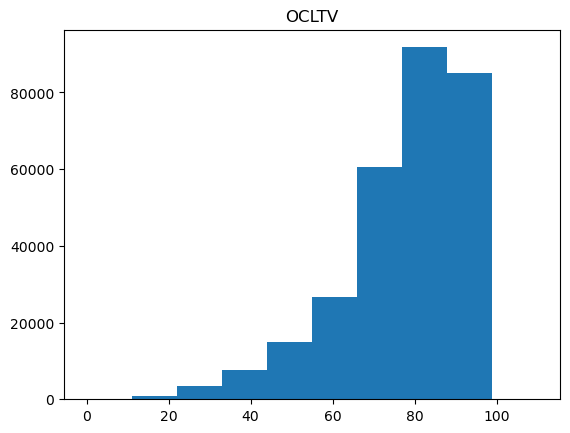

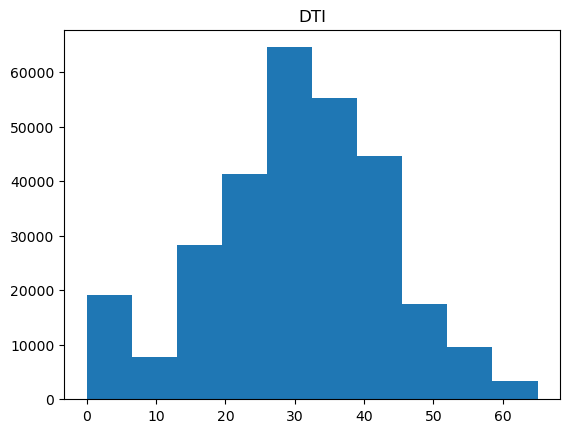

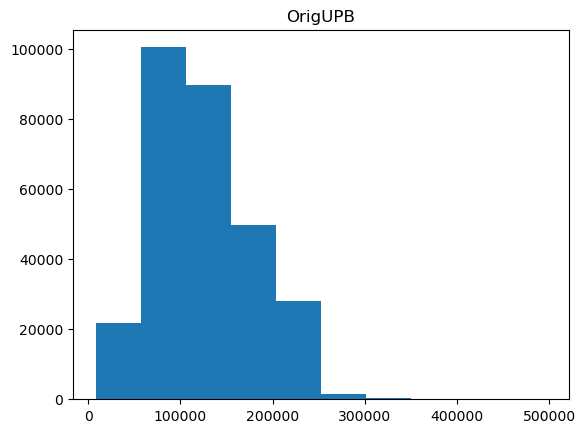

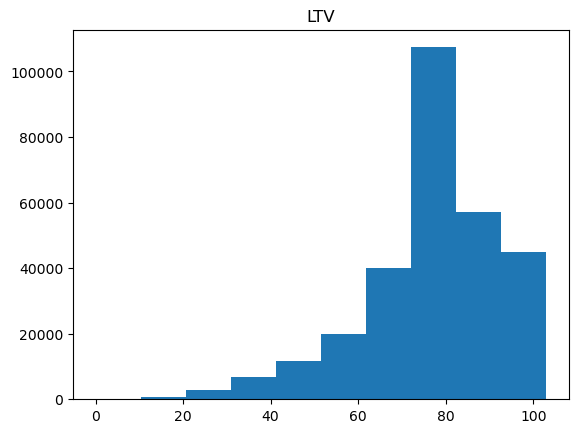

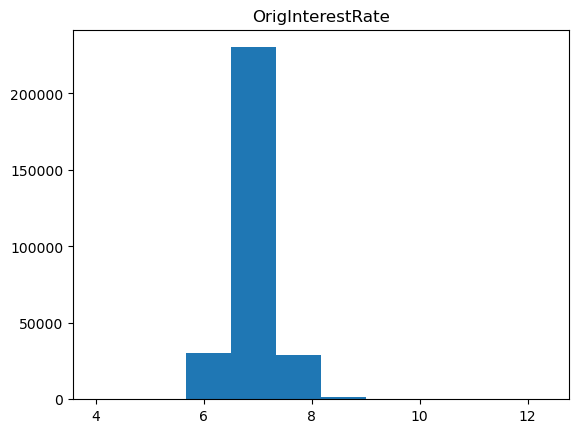

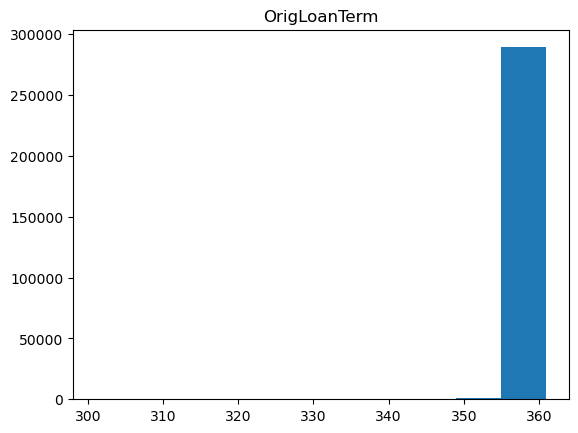

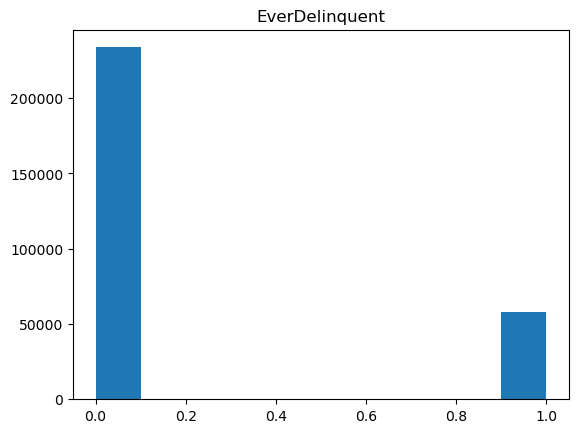

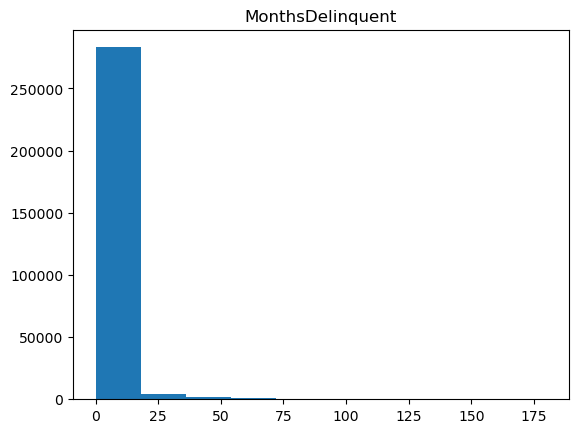

In [14]:
for numeric in BM_num[num[:-1]]:
    plt.hist(BM_num[numeric])
    plt.title(numeric)
    plt.show()

# Multivariate analysis

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


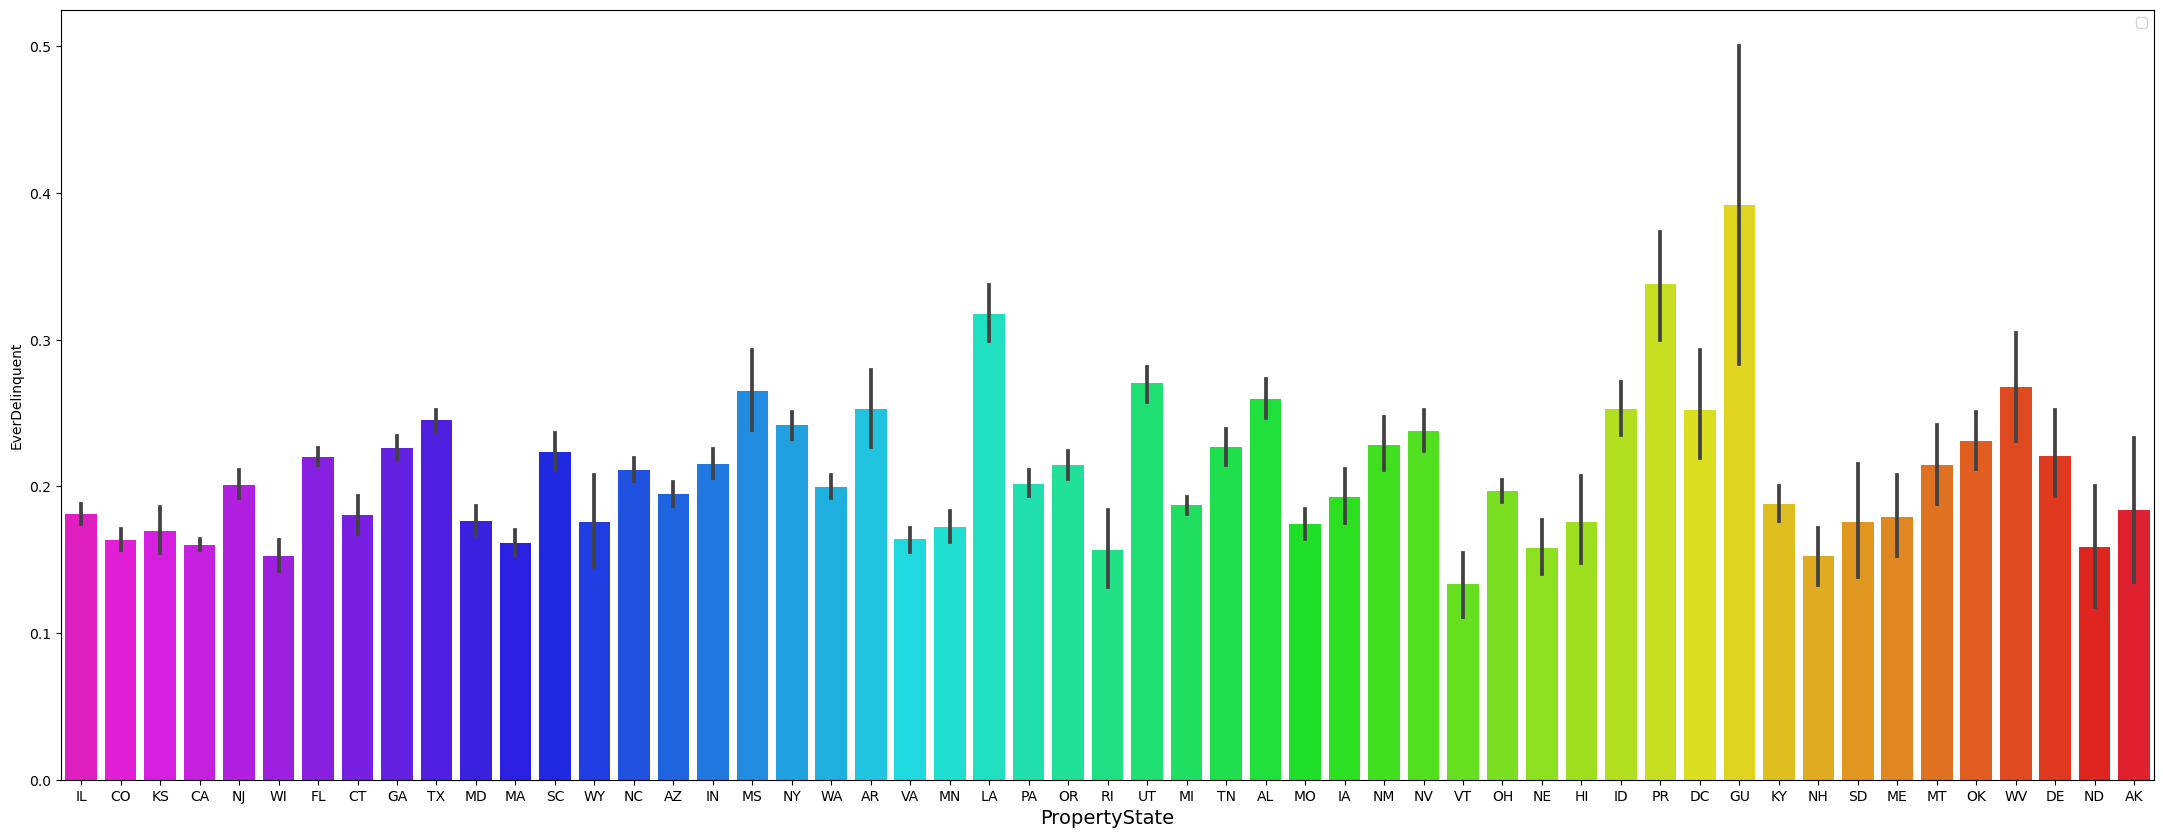

In [15]:
plt.figure(figsize=(27,10))
sns.barplot('PropertyState' ,'EverDelinquent', data=df ,palette='gist_rainbow_r')
plt.xlabel('PropertyState', fontsize=14)
plt.legend()
plt.show()

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


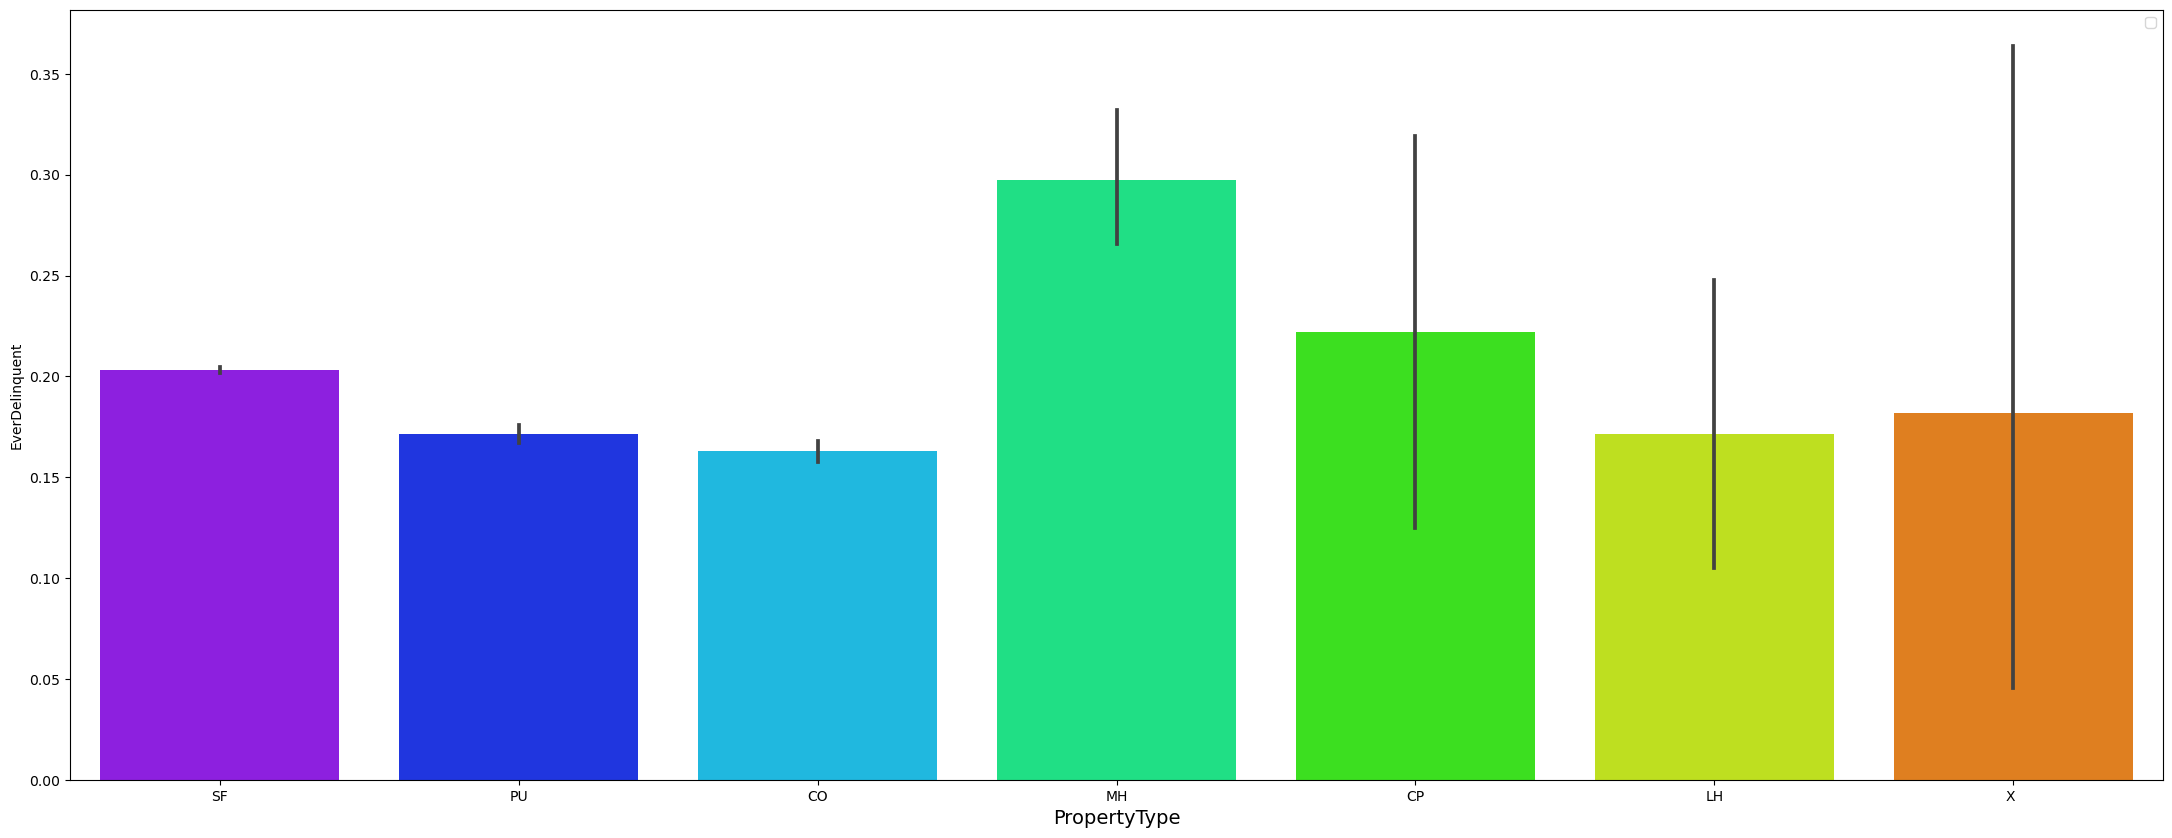

In [16]:
plt.figure(figsize=(27,10))
sns.barplot('PropertyType' ,'EverDelinquent', data=df ,palette='gist_rainbow_r')
plt.xlabel('PropertyType', fontsize=14)
plt.legend()
plt.show()

# Data Encoding

In [17]:
#Converting categorical features to numeric features
encode = LabelEncoder()
list_transform = ['FirstTimeHomebuyer','Occupancy','Channel','PPM','LoanPurpose']
for i in list_transform:
    df[i] = encode.fit_transform(df[i])
df['NumBorrowers'].unique()

array(['2', '1', 'X '], dtype=object)

In [18]:
df['MaturityDate'] = df['MaturityDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))
df['FirstPaymentDate'] = df['FirstPaymentDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))

<AxesSubplot:>

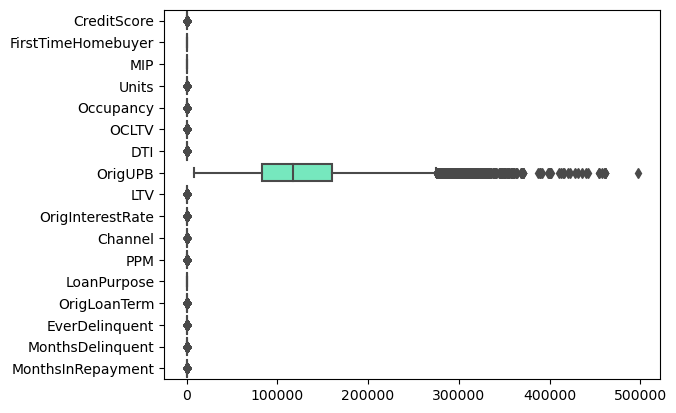

In [19]:
#Visualizing Outliers
def boxplot(col):
  sns.boxplot(data[col]) 

sns.boxplot(data=df,palette='rainbow',orient='h')

In [20]:
#checking for duplicates values
duplicate=data.duplicated()
print(duplicate.sum())

0


In [21]:
#Correlation
df.corr()

,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,LoanPurpose,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
CreditScore,1.000000,-0.038029,-0.164376,0.002808,0.002497,-0.190848,-0.098740,0.003770,-0.191080,-0.119472,0.007633,0.008359,-0.010079,-0.008075,-0.207204,-0.150266,-0.005127
FirstTimeHomebuyer,-0.038029,1.000000,0.123660,0.004864,-0.003157,0.128751,-0.081417,-0.039770,0.129092,0.006967,-0.051348,-0.024497,0.081933,0.011423,0.009156,0.015211,0.006661
MIP,-0.164376,0.123660,1.000000,-0.042111,0.044397,0.694789,0.111603,0.006729,0.695888,0.124544,-0.035503,-0.022119,0.444857,0.014834,0.059993,0.051204,-0.087802
Units,0.002808,0.004864,-0.042111,1.000000,-0.204041,-0.046133,0.012887,0.043827,-0.046032,0.074070,0.002283,-0.003105,-0.015747,0.005348,0.010163,-0.004573,0.025594
Occupancy,0.002497,-0.003157,0.044397,-0.204041,1.000000,0.049278,-0.000737,0.049724,0.049273,-0.158914,-0.017481,-0.008040,0.043213,-0.007625,-0.012291,-0.001255,-0.018539
OCLTV,-0.190848,0.128751,0.694789,-0.046133,0.049278,1.000000,0.114853,0.106273,0.999470,0.095268,-0.013396,-0.010452,0.419111,0.018560,0.065528,0.059811,-0.094299
DTI,-0.098740,-0.081417,0.111603,0.012887,-0.000737,0.114853,1.000000,0.063640,0.114468,0.105216,-0.040499,-0.004844,0.044237,0.028005,0.062109,0.040830,-0.007732
OrigUPB,0.003770,-0.039770,0.006729,0.043827,0.049724,0.106273,0.063640,1.000000,0.105722,-0.128563,0.087512,-0.037149,0.036861,-0.008008,-0.067605,-0.067243,-0.211698
LTV,-0.191080,0.129092,0.695888,-0.046032,0.049273,0.999470,0.114468,0.105722,1.000000,0.095520,-0.012719,-0.010455,0.419064,0.018477,0.065735,0.059930,-0.094596
OrigInterestRate,-0.119472,0.006967,0.124544,0.074070,-0.158914,0.095268,0.105216,-0.128563,0.095520,1.000000,0.008016,0.038771,0.024652,0.010794,0.060418,0.051706,-0.120378


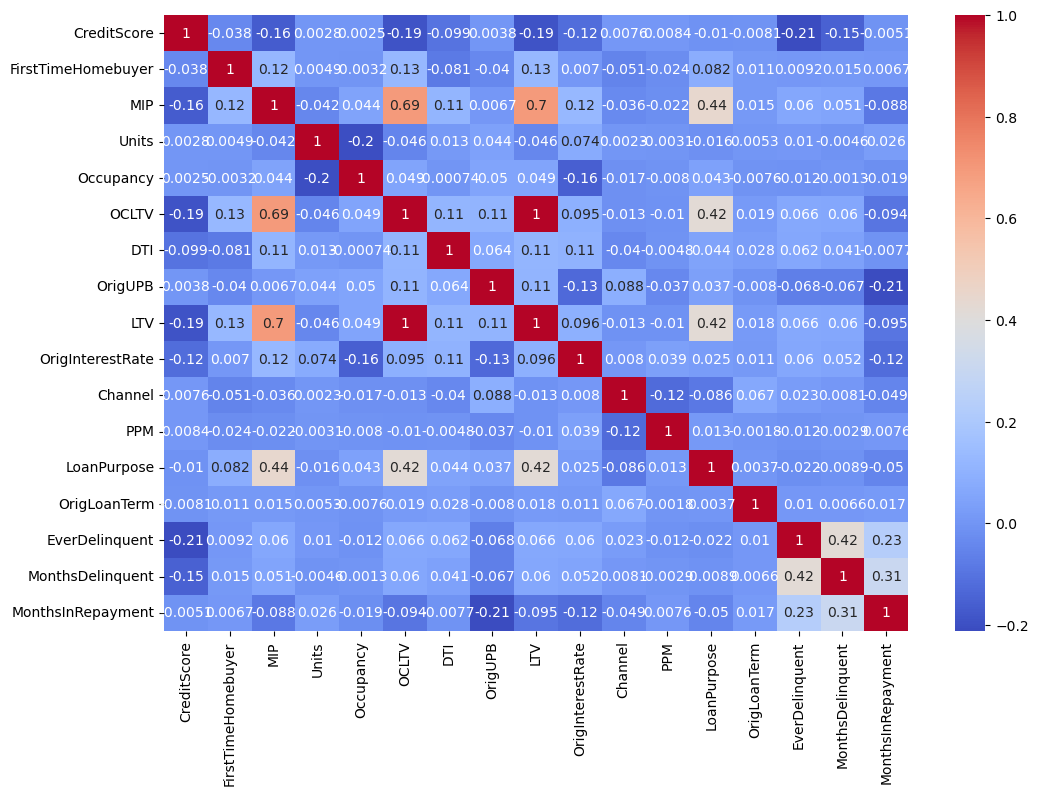

In [22]:
# Generate correlation matrix
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(12,8))

# Create heatmap with correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show plot
plt.show()

# Data Labelling

In [23]:
df.columns 

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [24]:
df.drop(["MonthsInRepayment",'MonthsDelinquent'],axis=1,inplace=True)
df.drop(["FirstPaymentDate","MaturityDate"],axis=1,inplace=True) #Timestamp 
x=df.drop(['EverDelinquent'], axis=1)
y=df['EverDelinquent']

In [25]:
x

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers
0,0,0,16974,25,1,1,89,27,117000,89,6.750,3,0,FRM,IL,SF,2,360,2
1,0,0,19740,0,1,1,73,17,109000,73,6.500,2,0,FRM,CO,SF,1,360,1
2,0,0,29940,0,1,1,75,16,88000,75,6.875,3,0,FRM,KS,SF,1,360,2
3,0,0,31084,0,1,1,76,14,160000,76,6.875,2,0,FRM,CA,SF,1,360,2
4,0,0,35644,0,1,1,78,18,109000,78,7.125,2,0,FRM,NJ,SF,1,360,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,0,37964,0,1,1,60,32,90000,60,7.000,2,0,FRM,PA,SF,1,360,2
291447,840,0,35644,0,1,1,73,0,267000,73,6.375,1,0,FRM,NY,SF,2,319,2
291448,840,0,42044,0,1,1,73,31,87000,73,5.625,2,0,FRM,CA,SF,1,313,1
291449,845,0,37964,0,1,0,80,54,88000,80,7.000,2,0,FRM,PA,SF,2,360,2


In [26]:
y

0         0
1         0
2         0
3         0
4         0
         ..
291446    0
291447    0
291448    0
291449    0
291450    0
Name: EverDelinquent, Length: 291451, dtype: int64